
**Task** **2**

Linear Regression model building for house price prediction

In [48]:
#Importing necessary libraries
import numpy as np
import pandas as pd

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score

In [50]:
#Load the dataset
df = pd.read_csv('/content/Bangalore  house data.csv')

In [51]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [52]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [54]:
#check null values
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [55]:
#converting size to bhk
#from string to float
#for numerical prediction
df['bhk'] = df['size'].str.extract('(\d+)').astype(float)

In [56]:
df['bhk']

,bhk
0,2.0
1,4.0
2,3.0
3,3.0
4,2.0
...,...
13315,5.0
13316,4.0
13317,2.0
13318,4.0


In [57]:
#funtion to convert string to float
def convert_sqft(x):
    try:
        if '-' in x:
            a, b = x.split('-')
            return (float(a) + float(b)) / 2
        return float(x)
    except:
        return None

In [58]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

In [59]:
df['total_sqft']

,total_sqft
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0
...,...
13315,3453.0
13316,3600.0
13317,1141.0
13318,4689.0


In [60]:
#filling nan values with median of total_sqft
df['total_sqft'] = df.groupby('bhk')['total_sqft'].transform(
    lambda x: x.fillna(x.median())
)

In [61]:
#removes the null vals of total_sqft
df = df[df['total_sqft'].notnull()]

In [62]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,0
society,5499
total_sqft,0
bath,57
balcony,593
price,0
bhk,0


In [63]:
#filling nan values with median of bath
df.loc[:, 'bath'] = df['bath'].fillna(df['bath'].median())

In [64]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,0
society,5499
total_sqft,0
bath,0
balcony,593
price,0
bhk,0


In [65]:
location_counts = df['location'].value_counts()
location_counts

,count
location,
Whitefield,539
Sarjapur Road,397
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
KAMAKIYA,1
Wheelers Road,1
MM Layout,1


In [66]:
df['location'].isna().sum()

np.int64(1)

In [67]:
#replace nan value with other
df.loc[:,'location'] = df['location'].replace('nan', 'other')

In [68]:
#one-hot encoding for linear regression model
df.loc[:,'location'] = df['location'].apply(lambda x: x if location_counts.get(x, 0) > 10 else 'other')
dummies = pd.get_dummies(df['location'], prefix = 'loc', drop_first = True)
df = pd.concat([df, dummies],axis = 1)

In [69]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,...,loc_Vishveshwarya Layout,loc_Vishwapriya Layout,loc_Vittasandra,loc_Whitefield,loc_Yelachenahalli,loc_Yelahanka,loc_Yelahanka New Town,loc_Yelenahalli,loc_Yeshwanthpur,loc_other
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0,...,False,False,False,False,False,False,False,False,False,False
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0,...,False,False,False,False,False,False,False,False,False,False
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5.0,...,False,False,False,True,False,False,False,False,False,False
13316,Super built-up Area,Ready To Move,other,4 BHK,NaN,3600.0,5.0,NaN,400.00,4.0,...,False,False,False,False,False,False,False,False,False,True
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2.0,...,False,False,False,False,False,False,False,False,False,False
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00,4.0,...,False,False,False,False,False,False,False,False,False,False


In [70]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
society,5499
...,...
loc_Yelahanka,0
loc_Yelahanka New Town,0
loc_Yelenahalli,0
loc_Yeshwanthpur,0


Now the the columns needed for X are clean without null values

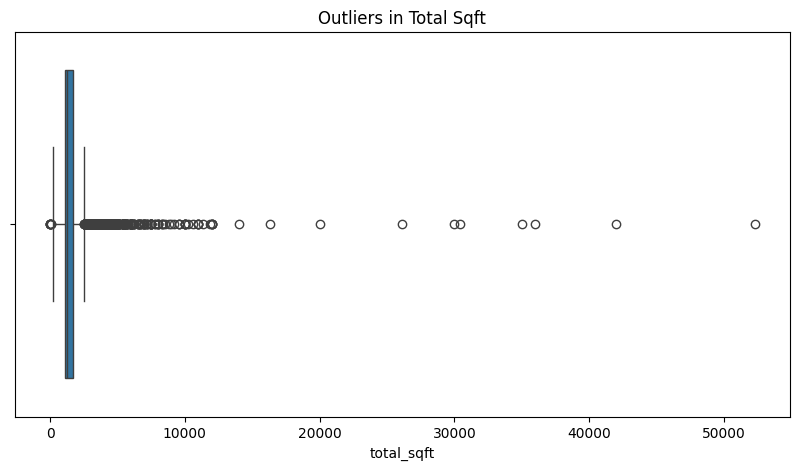

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

#boxplot to note the outliers in total_sqft
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['total_sqft'])
plt.title("Outliers in Total Sqft")
plt.show()

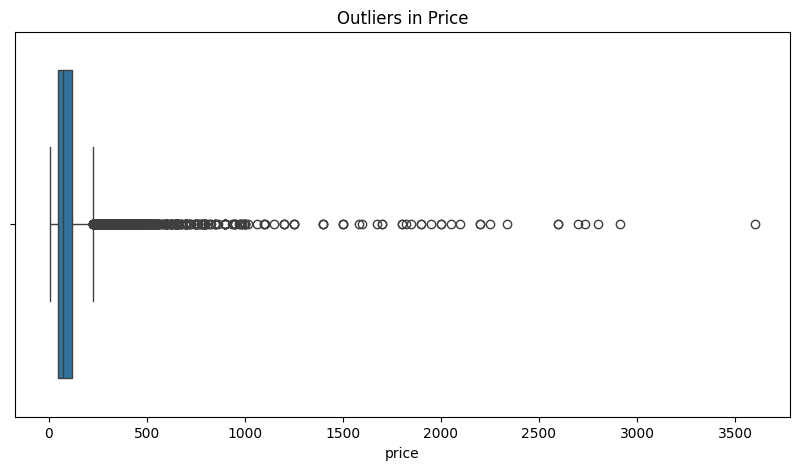

In [72]:
#ploting outliers in price
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title("Outliers in Price")
plt.show()

In [73]:
#funtion for removing outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [74]:
df = remove_outliers_iqr(df, 'total_sqft')
df = remove_outliers_iqr(df, 'price')

In [75]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,...,loc_Vishveshwarya Layout,loc_Vishwapriya Layout,loc_Vittasandra,loc_Whitefield,loc_Yelachenahalli,loc_Yelahanka,loc_Yelahanka New Town,loc_Yelenahalli,loc_Yeshwanthpur,loc_other
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0,...,False,False,False,False,False,False,False,False,False,False
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0,...,False,False,False,False,False,False,False,False,False,False
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262.0,2.0,2.0,47.00,2.0,...,False,False,False,False,False,False,False,False,False,False
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345.0,2.0,1.0,57.00,3.0,...,False,False,False,False,False,False,False,False,False,False
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,3.0,...,False,False,False,False,False,False,False,False,False,False
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2.0,...,False,False,False,False,False,False,False,False,False,False


# Linear regression model

In [76]:
X = df[['total_sqft','bath','bhk']+list(dummies.columns)]
y = df['price']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mae

16.574581893834136

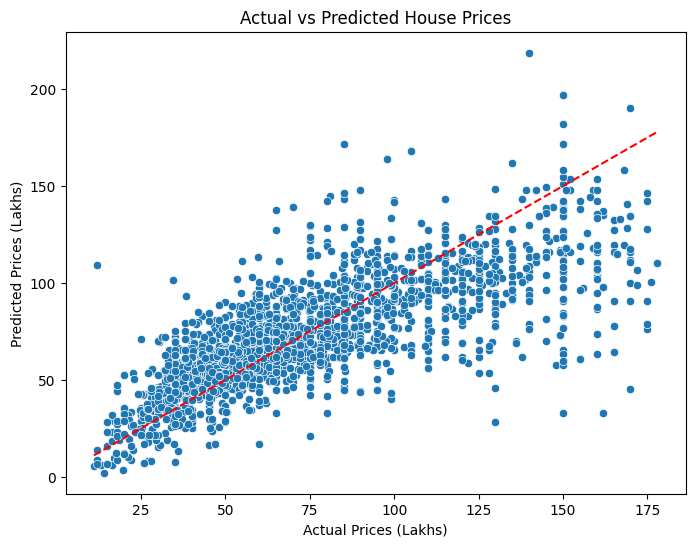

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices (Lakhs)")
plt.ylabel("Predicted Prices (Lakhs)")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Ideal line
plt.show()

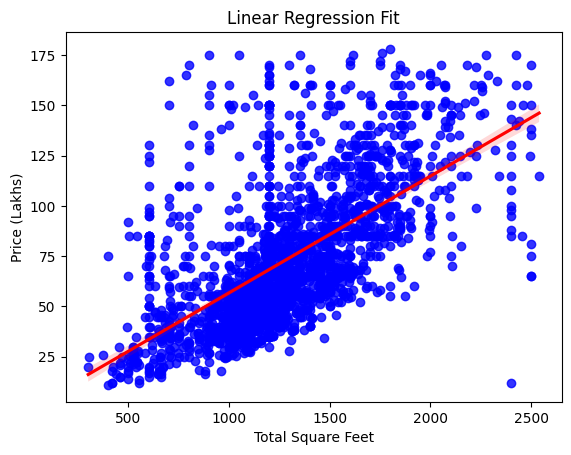

In [81]:
sns.regplot(x=X_test['total_sqft'], y=y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Total Square Feet")
plt.ylabel("Price (Lakhs)")
plt.title("Linear Regression Fit")
plt.show()

Predicting the price by collecting user input

In [82]:
location = input("Enter location: ")
total_sqft = float(input("Enter total square feet: "))
bath = int(input("Enter number of bathrooms: "))
bhk = int(input("Enter number of BHKs: "))

Enter location: Whitefield 
Enter total square feet: 1440
Enter number of bathrooms: 2
Enter number of BHKs: 2


In [83]:
input_df = pd.DataFrame(data=np.zeros((1, len(X.columns))), columns=X.columns)

input_df['total_sqft'] = total_sqft
input_df['bath'] = bath
input_df['bhk'] = bhk

location_col = f"loc_{location}"
if location_col in X.columns:
    input_df[location_col] = 1
else:
    input_df['loc_other'] = 1

In [84]:
predicted_price = model.predict(input_df)[0]
print(f"\nPredicted house price: ₹{predicted_price:.2f} Lakhs")


Predicted house price: ₹75.01 Lakhs
